In [203]:
import numpy as np
from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from matplotlib import cm

from keras.datasets import mnist

# For Progress Bar
from tqdm import tqdm

## Part I

In [3]:
# generate dataset
X=np.arange(0,30)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54])

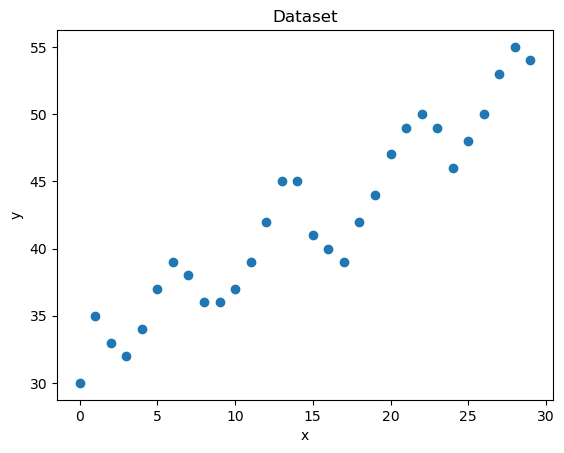

In [4]:
# plot data
plt.figure()
plt.title('Dataset')
plt.scatter(X,Y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [5]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
def train(net, train_X, train_Y, num_epochs):
    # Initialize the network and define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

    # Train the network
    for epoch in range(num_epochs):
        loss_record = []
        for i, (x, y) in enumerate(zip(train_X, train_Y)):
            optimizer.zero_grad()
            outputs = net(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            loss_record.append(loss.item())

        mean_loss = np.mean(loss_record)
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, mean_loss))

In [7]:
def test(net, X, Y):
    pred = []
    with torch.no_grad():
        lsqe = 0
        total = 0
        for x, y in zip(X, Y.numpy()):
            predicted = net(x).numpy()
            pred.append(predicted)
            total += 1
            lsqe += (y - predicted)**2

        lsqe = np.sqrt(lsqe)
        print('Least square error of the network: {} '.format(100 * lsqe / total))
        return pred

### Using the first 20 data points as training data and remaining 10 data points as test data

In [8]:
# split train and test dataset
train_X = torch.tensor(X[:20]).reshape(20,1).float()
train_Y = torch.tensor(Y[:20]).reshape(20,1).float()

test_X = torch.tensor(X[20:]).reshape(10,1).float()
test_Y = torch.tensor(Y[20:]).reshape(10,1).float()

In [9]:
net = Net()

In [10]:
train(net, train_X, train_Y, 100)

Epoch [1/100], Loss: 1257.0511
Epoch [2/100], Loss: 843.4117
Epoch [3/100], Loss: 449.8162
Epoch [4/100], Loss: 320.9951
Epoch [5/100], Loss: 271.0910
Epoch [6/100], Loss: 267.1594
Epoch [7/100], Loss: 265.3497
Epoch [8/100], Loss: 257.3284
Epoch [9/100], Loss: 249.4316
Epoch [10/100], Loss: 242.2805
Epoch [11/100], Loss: 234.7509
Epoch [12/100], Loss: 226.1120
Epoch [13/100], Loss: 216.2109
Epoch [14/100], Loss: 204.7082
Epoch [15/100], Loss: 193.7129
Epoch [16/100], Loss: 182.6346
Epoch [17/100], Loss: 170.4563
Epoch [18/100], Loss: 157.2167
Epoch [19/100], Loss: 140.8760
Epoch [20/100], Loss: 127.1409
Epoch [21/100], Loss: 114.6479
Epoch [22/100], Loss: 101.5644
Epoch [23/100], Loss: 89.9558
Epoch [24/100], Loss: 77.9775
Epoch [25/100], Loss: 66.9295
Epoch [26/100], Loss: 56.3722
Epoch [27/100], Loss: 47.1167
Epoch [28/100], Loss: 38.5545
Epoch [29/100], Loss: 31.0828
Epoch [30/100], Loss: 24.9791
Epoch [31/100], Loss: 19.6413
Epoch [32/100], Loss: 15.6077
Epoch [33/100], Loss: 12.1

In [11]:
# Test the network on training data
y_pred_train = test(net, train_X, train_Y)

Least square error of the network: [48.739872] 


In [12]:
# Test the network on testing data
y_pred_test = test(net, test_X, test_Y)

Least square error of the network: [177.15878] 


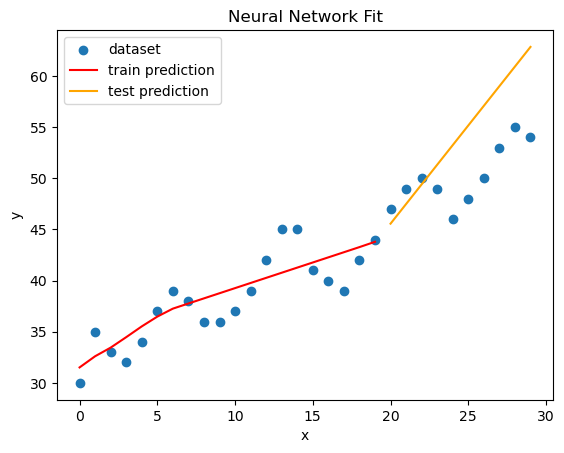

In [13]:
plt.figure()
plt.title('Neural Network Fit')
plt.scatter(X, Y, label='dataset')
plt.plot(train_X, y_pred_train, label='train prediction', color='r')
plt.plot(test_X, y_pred_test, label='test prediction', color='orange')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

### Using the first 10 and last 10 data points as training data and the middle 10 data points as test data

In [14]:
# split train and test dataset
train_X = torch.tensor(np.concatenate((X[:10], X[20:]))).reshape(20,1).float()
train_Y = torch.tensor(np.concatenate((Y[:10], Y[20:]))).reshape(20,1).float()

test_X = torch.tensor(X[10:20]).reshape(10,1).float()
test_Y = torch.tensor(Y[10:20]).reshape(10,1).float()

In [15]:
net = Net()

In [16]:
train(net, train_X, train_Y, 100)

Epoch [1/100], Loss: 1337.2404
Epoch [2/100], Loss: 761.1866
Epoch [3/100], Loss: 418.1654
Epoch [4/100], Loss: 361.9343
Epoch [5/100], Loss: 334.0647
Epoch [6/100], Loss: 339.1654
Epoch [7/100], Loss: 333.7220
Epoch [8/100], Loss: 330.3454
Epoch [9/100], Loss: 324.9255
Epoch [10/100], Loss: 320.4846
Epoch [11/100], Loss: 315.7379
Epoch [12/100], Loss: 310.8463
Epoch [13/100], Loss: 305.5018
Epoch [14/100], Loss: 299.6675
Epoch [15/100], Loss: 296.4916
Epoch [16/100], Loss: 286.3016
Epoch [17/100], Loss: 278.6817
Epoch [18/100], Loss: 269.1893
Epoch [19/100], Loss: 261.0227
Epoch [20/100], Loss: 251.3680
Epoch [21/100], Loss: 241.5115
Epoch [22/100], Loss: 231.1721
Epoch [23/100], Loss: 219.8247
Epoch [24/100], Loss: 207.9997
Epoch [25/100], Loss: 195.6717
Epoch [26/100], Loss: 183.6730
Epoch [27/100], Loss: 165.9850
Epoch [28/100], Loss: 154.3444
Epoch [29/100], Loss: 132.8821
Epoch [30/100], Loss: 119.1521
Epoch [31/100], Loss: 94.2814
Epoch [32/100], Loss: 79.0160
Epoch [33/100], Lo

In [17]:
# Test the network on training data
y_pred_train = test(net, train_X, train_Y)

Least square error of the network: [39.126102] 


In [18]:
# Test the network on testing data
y_pred_test = test(net, test_X, test_Y)

Least square error of the network: [88.81961] 


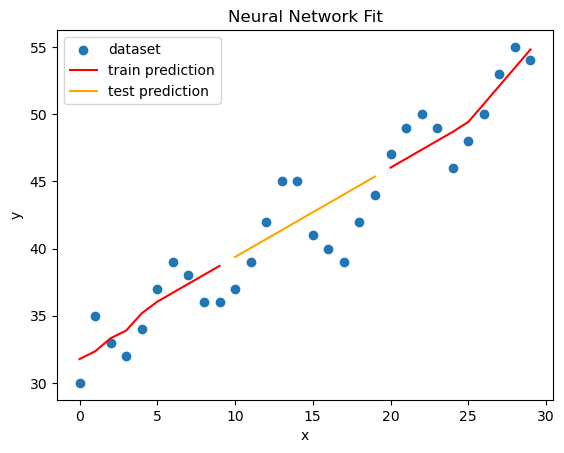

In [19]:
plt.figure()
plt.title('Neural Network Fit')
plt.scatter(X, Y, label='dataset')
plt.plot(train_X[:10], y_pred_train[:10], label='train prediction', color='r')
plt.plot(train_X[10:], y_pred_train[10:], color='r')
plt.plot(test_X, y_pred_test, label='test prediction', color='orange')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

## Part II

In [99]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(train_X.shape[0], train_x.shape[1]**2)
test_x = test_x.reshape(test_X.shape[0], test_x.shape[1]**2)

print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


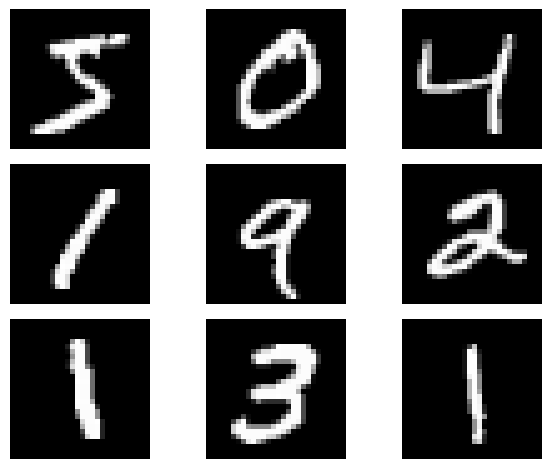

In [100]:
plt.figure()
for i in range(9):  
    plt.subplot(3, 3, 1 + i)
    plt.imshow(train_x[i].reshape(28, 28), cmap=cm.gray)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### Compute the first 20 PCA modes of the digit images

In [101]:
X_data = np.vstack((train_x, test_x))
print(X_data.shape)

(70000, 784)


In [102]:
pca = PCA(n_components=20)
pca.fit(X_data)
componenets = pca.components_

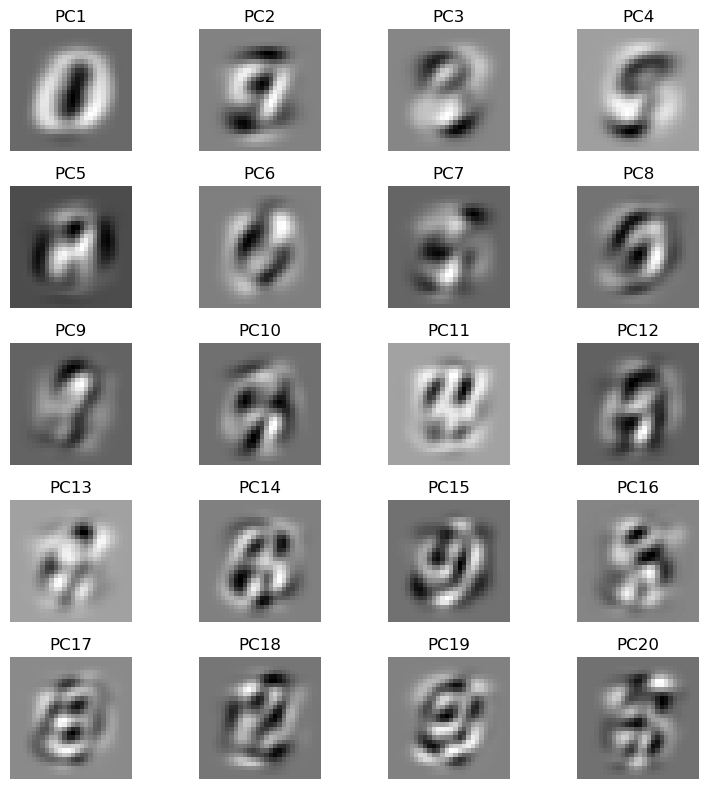

In [103]:
plt.figure(figsize=(8,8))
for i in range(componenets.shape[0]):  
    plt.subplot(5, 4, 1 + i)
    plt.imshow(componenets[i].reshape(28, 28), cmap=cm.gray)
    plt.axis('off')
    plt.title('PC' + str(i+1))
plt.tight_layout()
plt.show()

### Build a feed-foward neural network to classify the digits

In [185]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('data/train', download=True, train=True, transform=transform)
testset = datasets.MNIST('data/test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [193]:
# Define the neural network architecture
class ImageNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [214]:
def train(net, dataloader, num_epochs):
    # Initialize the network and define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    
    # Train the network
    for epoch in range(num_epochs):
        loss_record = []
        train_pbar = tqdm(dataloader, position=0, leave=True)
        for x, y in train_pbar:
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device) 
            outputs = net(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            loss_record.append(loss.item())

        mean_loss = np.mean(loss_record)
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, mean_loss))

In [220]:
def validate(model, test_loader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [221]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [222]:
image_net = ImageNet().to(device)

In [223]:
train(image_net, trainloader, 20)

100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 75.22it/s]


Epoch [1/20], Loss: 0.2727


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 77.35it/s]


Epoch [2/20], Loss: 0.1345


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 76.20it/s]


Epoch [3/20], Loss: 0.1028


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 75.07it/s]


Epoch [4/20], Loss: 0.0821


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 72.83it/s]


Epoch [5/20], Loss: 0.0728


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 74.30it/s]


Epoch [6/20], Loss: 0.0623


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 71.92it/s]


Epoch [7/20], Loss: 0.0532


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 71.16it/s]


Epoch [8/20], Loss: 0.0506


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 72.18it/s]


Epoch [9/20], Loss: 0.0459


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 71.64it/s]


Epoch [10/20], Loss: 0.0404


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 71.93it/s]


Epoch [11/20], Loss: 0.0375


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 72.75it/s]


Epoch [12/20], Loss: 0.0378


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 73.49it/s]


Epoch [13/20], Loss: 0.0352


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 73.06it/s]


Epoch [14/20], Loss: 0.0338


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 72.22it/s]


Epoch [15/20], Loss: 0.0305


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 72.53it/s]


Epoch [16/20], Loss: 0.0316


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:13<00:00, 71.74it/s]


Epoch [17/20], Loss: 0.0262


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 72.33it/s]


Epoch [18/20], Loss: 0.0325


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 73.00it/s]


Epoch [19/20], Loss: 0.0319


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:12<00:00, 73.31it/s]

Epoch [20/20], Loss: 0.0252


In [224]:
validate(image_net, testloader)

Accuracy of the network on the 10000 test images: 98 %
